# Capstone Project - The Battle of Neighborhoods (Week 1)

### Background

This project is to explore and make a comparison of different coffee shops in Tokyo, Japan and Toronto, Canada. Total coffee consumption in Japan has increased gradually over the last decade, reaching a consumption of over 7.8 million 60kg bags of coffee in 2018. The increasing trend is due to consumer preferences changed from tea to coffee. According to the Coffee Association of Canada, 2/3 of Canadians enjoy at least one cup a day with the average at 3.2 cups a day in 2018. Personally, I am a coffee lover, so I am interested in finding out what is the most popular coffee shop or brand in Tokyo and Toronto, whether it is a local brand or an imported brand. What role is Starbucks, as the largest coffee company in the world, playing in the coffee market in Tokyo and Toronto?

### Data description

The data used in this project is based on results from Foursquare. I find out the latitude and longitude of Tokyo and Toronto, then limited the radius to 500 to ensure managable data size. Then I used query endpoint to find out all the coffee shops in the limited area, including id, location, name, postal codes and other information. Some information is missing from the results from Foursquare, however, this did not impact on this project as the unique id is used as the priorty distinguisher. The next step is to filter and cleane the data for visulisation purposes (bar charts).

In [87]:
# import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


In [2]:
CLIENT_ID = '24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP' # your Foursquare ID
CLIENT_SECRET = '5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP
CLIENT_SECRET:5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI


In [3]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.6828387 139.7594549


In [20]:
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')


coffee .... OK!


In [22]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=35.6828387,139.7594549&oauth_token=&v=20180604&query=coffee&radius=500&limit=50'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=35.6828387,139.7594549&oauth_token=&v=20180604&query=coffee&radius=500&limit=50'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fca946e7c5f250923016a1e'},
 'response': {'venues': [{'id': '5901b70a8f2c1a0693ad3695',
    'name': '5 CROSSTIES COFFEE',
    'location': {'address': '丸の内1-9-1',
     'crossStreet': 'JR東京駅 B1F グランスタ',
     'lat': 35.68153067507607,
     'lng': 139.76516297361587,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.68153067507607,
       'lng': 139.76516297361587}],
     'distance': 536,
     'postalCode': '100-0005',
     'cc': 'JP',
     'neighborhood': 'Marunouchi, Tokyo, Tōkyō',
     'city': '千代田区',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['丸の内1-9-1 (JR東京駅 B1F グランスタ)',
      '千代田区, 東京都',
      '100-0005',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    're

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [ ]:
venues = results['response']['venues']


In [27]:
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress
0,5901b70a8f2c1a0693ad3695,5 CROSSTIES COFFEE,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607111790,False,丸の内1-9-1,JR東京駅 B1F グランスタ,35.681531,139.765163,"[{'label': 'display', 'lat': 35.68153067507607...",536,100-0005,JP,"Marunouchi, Tokyo, Tōkyō",千代田区,東京都,日本,"[丸の内1-9-1 (JR東京駅 B1F グランスタ), 千代田区, 東京都, 100-00..."
1,4fb4b412e4b0a6875b055aa0,Tully's Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607111790,False,丸の内1-1-1,パレスビル B1F,35.685285,139.761624,"[{'label': 'display', 'lat': 35.68528453467709...",335,100-0005,JP,NaN,東京,東京都,日本,"[丸の内1-1-1 (パレスビル B1F), 千代田区, 東京都, 100-0005, 日本]"
2,58ae54eff2299529b3b1327f,Tully's Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607111790,False,大手町1-1-1,大手町パークビルディング B1F,35.686773,139.763202,"[{'label': 'display', 'lat': 35.686773, 'lng':...",553,100-0004,JP,NaN,東京,東京都,日本,"[大手町1-1-1 (大手町パークビルディング B1F), 千代田区, 東京都, 100-0..."
3,54b8e599498e7c86d17e4b74,Seattle's Best Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607111790,False,丸の内2-1-1,丸の内 MY PLAZA B2F,35.679361,139.762138,"[{'label': 'display', 'lat': 35.67936113804745...",456,NaN,JP,NaN,東京,東京都,日本,"[丸の内2-1-1 (丸の内 MY PLAZA B2F), 千代田区, 東京都, 日本]"
4,4f508e83e4b0390b950b2393,Tully's Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607111790,False,丸の内1-4-1,丸の内永楽ビル iiyo!! B1F,35.684433,139.765191,"[{'label': 'display', 'lat': 35.68443318204593...",548,100-0005,JP,NaN,千代田区,東京都,日本,"[丸の内1-4-1 (丸の内永楽ビル iiyo!! B1F), 千代田区, 東京都, 100..."


In [29]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]


In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [31]:
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

In [32]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


In [39]:
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,5 CROSSTIES COFFEE,Coffee Shop,丸の内1-9-1,JR東京駅 B1F グランスタ,35.681531,139.765163,"[{'label': 'display', 'lat': 35.68153067507607...",536,100-0005,JP,"Marunouchi, Tokyo, Tōkyō",千代田区,東京都,日本,"[丸の内1-9-1 (JR東京駅 B1F グランスタ), 千代田区, 東京都, 100-00...",5901b70a8f2c1a0693ad3695
1,Tully's Coffee,Coffee Shop,丸の内1-1-1,パレスビル B1F,35.685285,139.761624,"[{'label': 'display', 'lat': 35.68528453467709...",335,100-0005,JP,NaN,東京,東京都,日本,"[丸の内1-1-1 (パレスビル B1F), 千代田区, 東京都, 100-0005, 日本]",4fb4b412e4b0a6875b055aa0
2,Tully's Coffee,Coffee Shop,大手町1-1-1,大手町パークビルディング B1F,35.686773,139.763202,"[{'label': 'display', 'lat': 35.686773, 'lng':...",553,100-0004,JP,NaN,東京,東京都,日本,"[大手町1-1-1 (大手町パークビルディング B1F), 千代田区, 東京都, 100-0...",58ae54eff2299529b3b1327f
3,Seattle's Best Coffee,Coffee Shop,丸の内2-1-1,丸の内 MY PLAZA B2F,35.679361,139.762138,"[{'label': 'display', 'lat': 35.67936113804745...",456,NaN,JP,NaN,東京,東京都,日本,"[丸の内2-1-1 (丸の内 MY PLAZA B2F), 千代田区, 東京都, 日本]",54b8e599498e7c86d17e4b74
4,Tully's Coffee,Coffee Shop,丸の内1-4-1,丸の内永楽ビル iiyo!! B1F,35.684433,139.765191,"[{'label': 'display', 'lat': 35.68443318204593...",548,100-0005,JP,NaN,千代田区,東京都,日本,"[丸の内1-4-1 (丸の内永楽ビル iiyo!! B1F), 千代田区, 東京都, 100...",4f508e83e4b0390b950b2393


In [40]:
print(dataframe_filtered.shape)

(15, 16)


In [42]:
n_by_name = dataframe.groupby('name').count()
n_by_name.head(10)

,id,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress
name,,,,,,,,,,,,,,,,,
5 CROSSTIES COFFEE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Doutor Coffee Shop (ドトールコーヒーショップ),2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
On-the-Rock CoffeeRoom,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1
Seattle's Best Coffee,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1
Starbucks,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
Tully's Coffee,7,7,7,7,6,7,7,7,7,7,7,7,1,7,7,7,7


In [51]:
data_clean=n_by_name.filter(['name','id'])
data_clean.head(10)

,id
name,
5 CROSSTIES COFFEE,1
Doutor Coffee Shop (ドトールコーヒーショップ),2
On-the-Rock CoffeeRoom,1
Seattle's Best Coffee,1
Starbucks,3
Tully's Coffee,7


In [55]:
data_update=((data_clean['id']/data_clean['id'].sum())*100).round(2).astype(str)+'%'
data_update.head(10)

name
5 CROSSTIES COFFEE                    6.67%
Doutor Coffee Shop (ドトールコーヒーショップ)    13.33%
On-the-Rock CoffeeRoom                6.67%
Seattle's Best Coffee                 6.67%
Starbucks                             20.0%
Tully's Coffee                       46.67%
Name: id, dtype: object

In [70]:
df=data_clean.rename(columns={'id':'number'})
df.head(10)

,number
name,
5 CROSSTIES COFFEE,1
Doutor Coffee Shop (ドトールコーヒーショップ),2
On-the-Rock CoffeeRoom,1
Seattle's Best Coffee,1
Starbucks,3
Tully's Coffee,7


In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Coffee Shop Brand Market Share in Tokyo -limited to Radius 500')

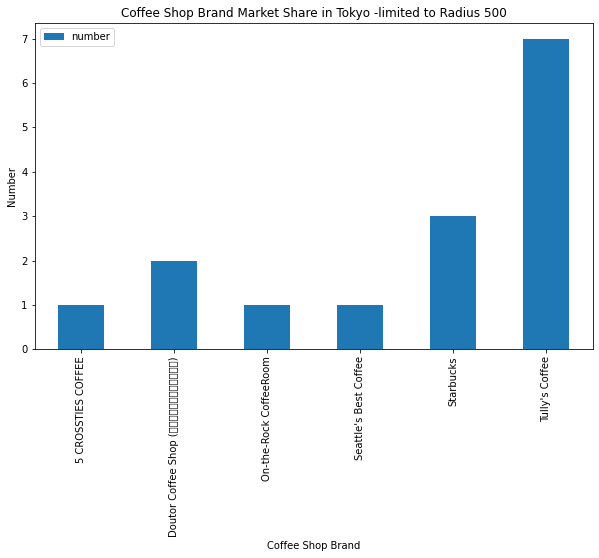

In [77]:
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Coffee Shop Brand') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Coffee Shop Brand Market Share in Tokyo -limited to Radius 500') # add title to the plot

In [88]:
venue_id = '4fb4b412e4b0a6875b055aa0' # ID of Tully's Coffee
url1 = 'https://api.foursquare.com/v2/venues{}?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=35.6828387,139.7594549&oauth_token=&v=20180604'.format(venue_id,CLIENT_ID,CLIENT_SECRET)
url1

'https://api.foursquare.com/v2/venues4fb4b412e4b0a6875b055aa0?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=35.6828387,139.7594549&oauth_token=&v=20180604'

In [89]:
result = requests.get(url1).json()

In [91]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')


This venue has not been rated yet.


In [92]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [93]:
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')

coffee .... OK!


In [101]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=43.6534817,-79.3839347&oauth_token=&v=20180604&query=coffee&radius=500&limit=50'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=24TL4CGZ5MYTQ5S423LL5OINPFPOZ5WTTYMH2T55X4YNIRWP&client_secret=5MQBZ3XB00SJ1MATRO1MWX5VADJ2XETQXIIKT5HOWYGHJACI&ll=43.6534817,-79.3839347&oauth_token=&v=20180604&query=coffee&radius=500&limit=50'

In [103]:
results_T = requests.get(url1).json()
results_T

{'meta': {'code': 200, 'requestId': '5fcab12a37f45509dfdf2b5a'},
 'response': {'venues': [{'id': '59f784dd28122f14f9d5d63d',
    'name': 'HotBlack Coffee',
    'location': {'address': '245 Queen Street West',
     'crossStreet': 'at St Patrick St',
     'lat': 43.65036434800487,
     'lng': -79.38866907575726,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65036434800487,
       'lng': -79.38866907575726}],
     'distance': 515,
     'postalCode': 'M5V 1Z4',
     'cc': 'CA',
     'neighborhood': 'Entertainment District',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['245 Queen Street West (at St Patrick St)',
      'Toronto ON M5V 1Z4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'pr

In [105]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_T = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered_T = dataframe.loc[:, filtered_columns]

In [106]:
venues_T = results['response']['venues']

In [107]:
dataframe_T = json_normalize(venues)
dataframe_T.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,59f784dd28122f14f9d5d63d,HotBlack Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607119026,False,245 Queen Street West,at St Patrick St,43.650364,-79.388669,"[{'label': 'display', 'lat': 43.65036434800487...",515,M5V 1Z4,CA,Entertainment District,Toronto,ON,Canada,"[245 Queen Street West (at St Patrick St), Tor...",463001529
1,4b0aaa8ef964a520272623e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607119026,False,"483 Bay St, Bell Trinity Square",Bell Trinity Square,43.653436,-79.382314,"[{'label': 'display', 'lat': 43.653436, 'lng':...",130,M5G 2C9,CA,NaN,Toronto,ON,Canada,"[483 Bay St, Bell Trinity Square (Bell Trinity...",NaN
2,4b44fc77f964a520cc0026e3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607119026,False,427 University Avenue,NaN,43.654053,-79.388090,"[{'label': 'display', 'lat': 43.65405317976302...",340,NaN,CA,NaN,Toronto,ON,Canada,"[427 University Avenue, Toronto ON, Canada]",NaN
3,4baa9f6cf964a520817a3ae3,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607119026,False,401 Bay St.,at Richmond St. W,43.652135,-79.381172,"[{'label': 'display', 'lat': 43.65213455850074...",268,M5H 2Y4,CA,NaN,Toronto,ON,Canada,"[401 Bay St. (at Richmond St. W), Toronto ON M...",NaN
4,53e8acc4498ee294fb100183,Timothy's World Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607119026,False,425 University Ave,Dundas,43.654270,-79.387448,"[{'label': 'display', 'lat': 43.65427, 'lng': ...",296,M5G 1T6,CA,NaN,Toronto,ON,Canada,"[425 University Ave (Dundas), Toronto ON M5G 1...",NaN


In [109]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [110]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



In [111]:
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

In [112]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

In [113]:
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,HotBlack Coffee,Coffee Shop,245 Queen Street West,at St Patrick St,43.650364,-79.388669,"[{'label': 'display', 'lat': 43.65036434800487...",515,M5V 1Z4,CA,Entertainment District,Toronto,ON,Canada,"[245 Queen Street West (at St Patrick St), Tor...",59f784dd28122f14f9d5d63d
1,Timothy's World Coffee,Coffee Shop,"483 Bay St, Bell Trinity Square",Bell Trinity Square,43.653436,-79.382314,"[{'label': 'display', 'lat': 43.653436, 'lng':...",130,M5G 2C9,CA,NaN,Toronto,ON,Canada,"[483 Bay St, Bell Trinity Square (Bell Trinity...",4b0aaa8ef964a520272623e3
2,Timothy's World Coffee,Coffee Shop,427 University Avenue,NaN,43.654053,-79.388090,"[{'label': 'display', 'lat': 43.65405317976302...",340,NaN,CA,NaN,Toronto,ON,Canada,"[427 University Avenue, Toronto ON, Canada]",4b44fc77f964a520cc0026e3
3,Timothy's World Coffee,Coffee Shop,401 Bay St.,at Richmond St. W,43.652135,-79.381172,"[{'label': 'display', 'lat': 43.65213455850074...",268,M5H 2Y4,CA,NaN,Toronto,ON,Canada,"[401 Bay St. (at Richmond St. W), Toronto ON M...",4baa9f6cf964a520817a3ae3
4,Timothy's World Coffee,Coffee Shop,425 University Ave,Dundas,43.654270,-79.387448,"[{'label': 'display', 'lat': 43.65427, 'lng': ...",296,M5G 1T6,CA,NaN,Toronto,ON,Canada,"[425 University Ave (Dundas), Toronto ON M5G 1...",53e8acc4498ee294fb100183


In [114]:
print(dataframe_filtered.shape)

(40, 16)


In [117]:
n_by_name_T = dataframe.groupby('name').count()
n_by_name_T.head(40)

,id,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
name,,,,,,,,,,,,,,,,,,
Bluestone Lane Queen Station Coffee Shop,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0
Bulldog Coffee,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
Coffee Antidote 9th Floor,1,1,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0
Coffee Court,1,1,1,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0
Coffee Exchange,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
Coffee office,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0
Cozy Coffee,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
Dineen Coffee,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Dutton Employment Law,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0


In [118]:
data_clean_T=n_by_name_T.filter(['name','id'])
data_clean_T.head(30)

,id
name,
Bluestone Lane Queen Station Coffee Shop,1
Bulldog Coffee,1
Coffee Antidote 9th Floor,1
Coffee Court,1
Coffee Exchange,1
Coffee office,1
Cozy Coffee,1
Dineen Coffee,1
Dutton Employment Law,1


In [119]:
df_T=data_clean_T.rename(columns={'id':'number'})
df_T.head(30)

,number
name,
Bluestone Lane Queen Station Coffee Shop,1
Bulldog Coffee,1
Coffee Antidote 9th Floor,1
Coffee Court,1
Coffee Exchange,1
Coffee office,1
Cozy Coffee,1
Dineen Coffee,1
Dutton Employment Law,1


Text(0.5, 1.0, 'Coffee Shop Brand Market Share in Toronto -limited to Radius 500')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12502 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12502 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/envs/Python-3.7-main/lib/python3.

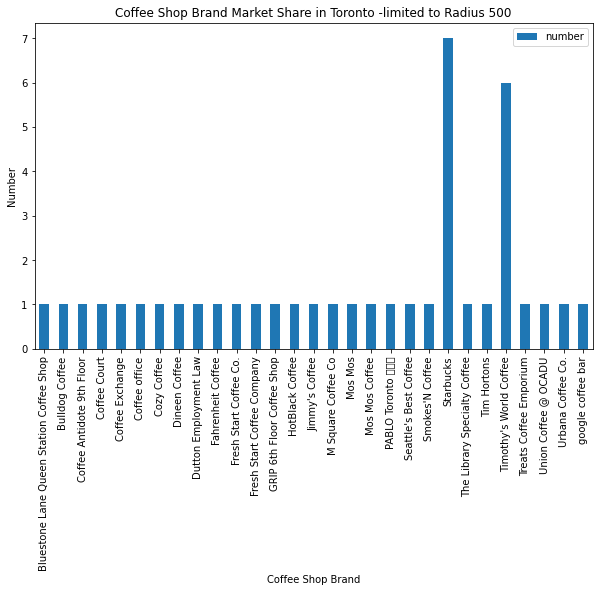

In [120]:
df_T.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Coffee Shop Brand') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Coffee Shop Brand Market Share in Toronto -limited to Radius 500') # add title to the plot

In [122]:
data_update_T=((data_clean_T['id']/data_clean_T['id'].sum())*100).round(2).astype(str)+'%'
data_update_T.head(30)

name
Bluestone Lane Queen Station Coffee Shop     2.5%
Bulldog Coffee                               2.5%
Coffee Antidote 9th Floor                    2.5%
Coffee Court                                 2.5%
Coffee Exchange                              2.5%
Coffee office                                2.5%
Cozy Coffee                                  2.5%
Dineen Coffee                                2.5%
Dutton Employment Law                        2.5%
Fahrenheit Coffee                            2.5%
Fresh Start Coffee Co.                       2.5%
Fresh Start Coffee Company                   2.5%
GRIP 6th Floor Coffee Shop                   2.5%
HotBlack Coffee                              2.5%
Jimmy's Coffee                               2.5%
M Square Coffee Co                           2.5%
Mos Mos                                      2.5%
Mos Mos Coffee                               2.5%
PABLO Toronto パブロ                            2.5%
Seattle's Best Coffee                        